In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pingouin as pg

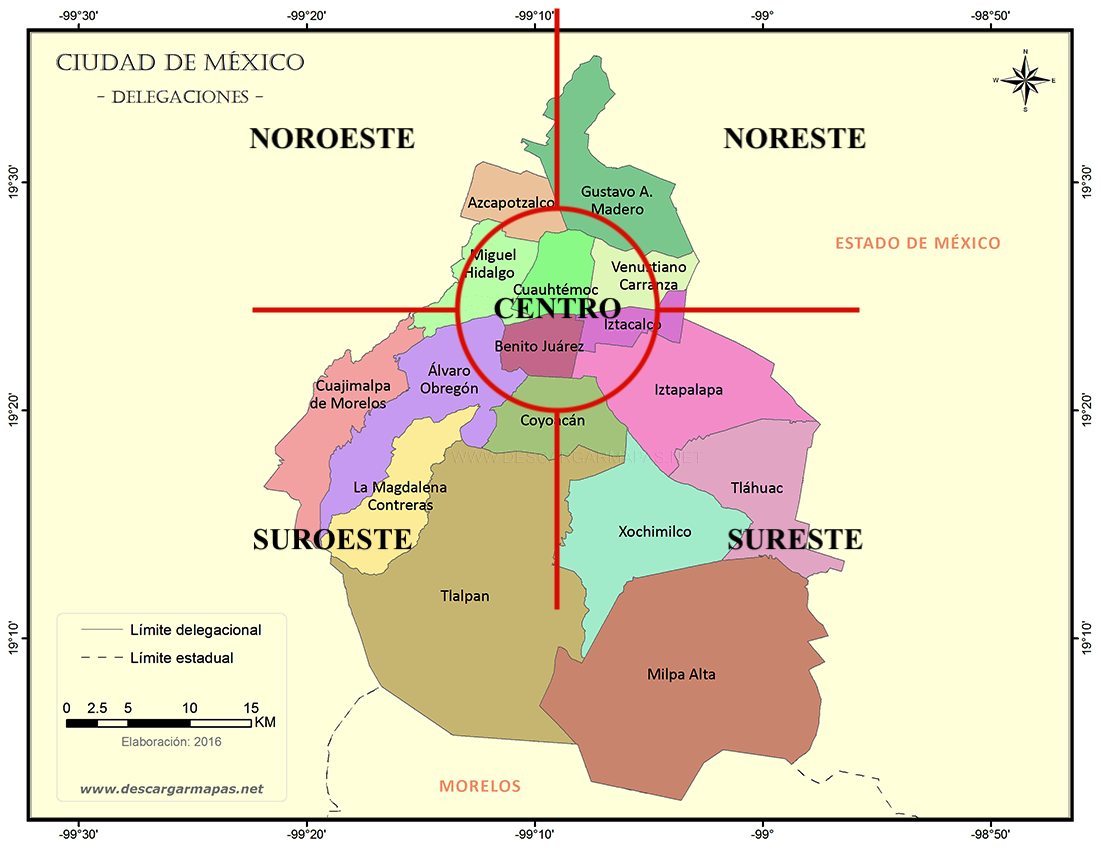

#### 1. Obtenga un Dataframe con las concentraciones promedio diarias de ozono por región de 2022 a 2023 y un gráfico de la concentración promedio mensual por región.



In [6]:
indice_22 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/indice_2022.csv",parse_dates = True, index_col=0)
indice_23 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/indice_2023.csv",parse_dates = True, index_col=0)


Llamando a fillna con un diccionario se puede utilizar un valor de relleno distinto para cada columna:

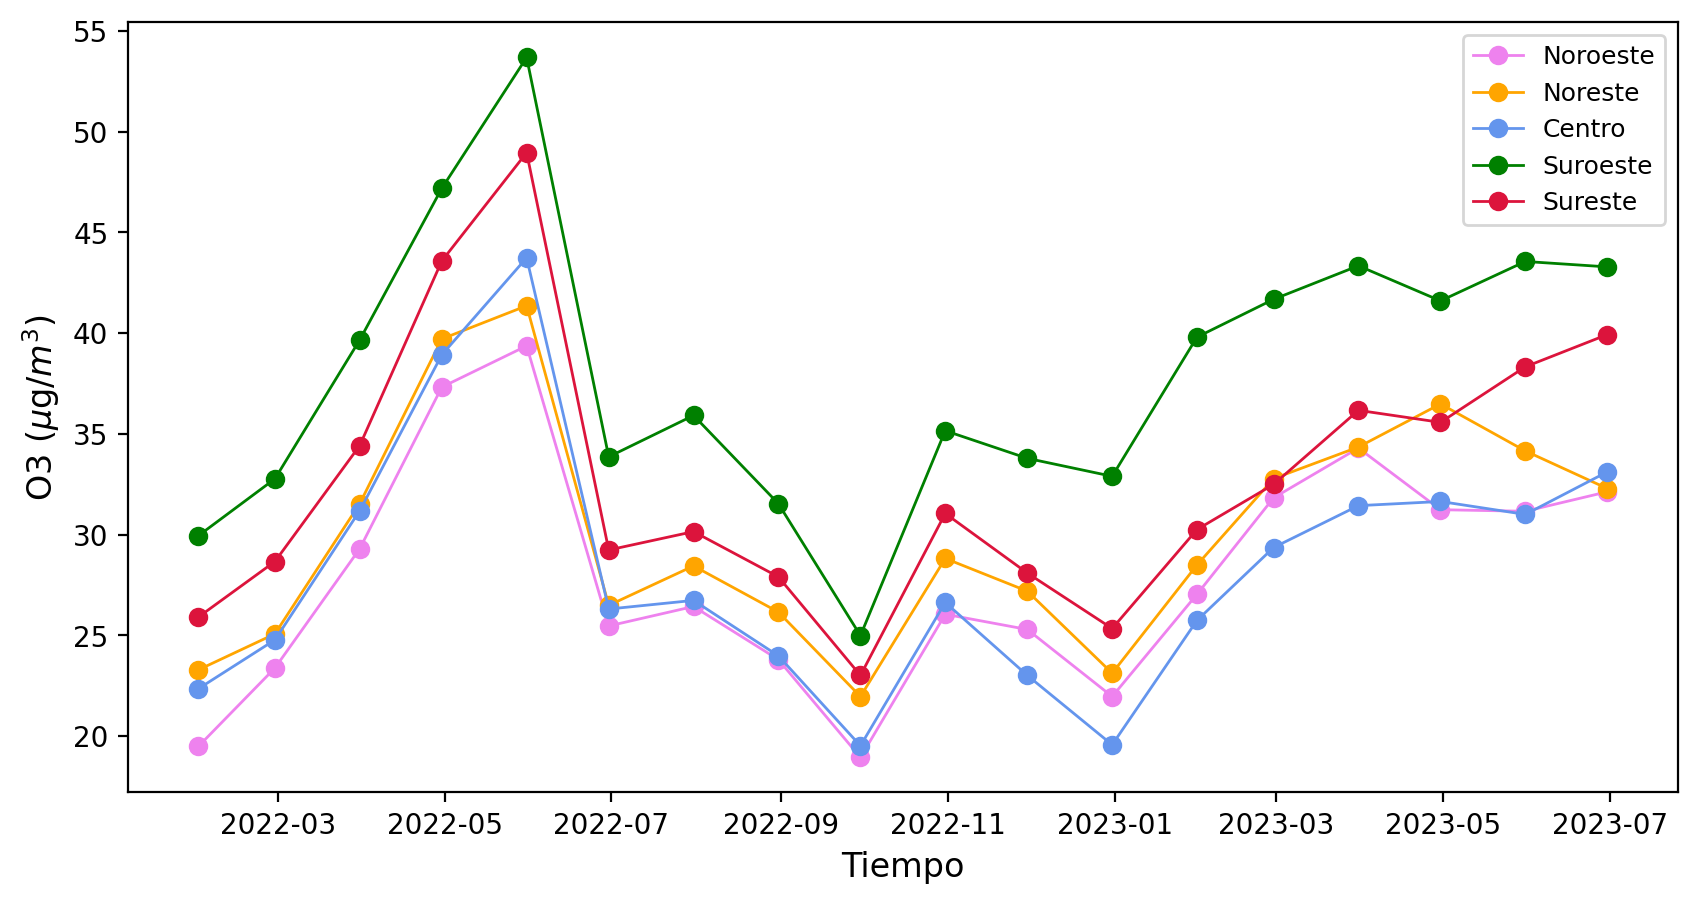

In [11]:
fig, ax = plt.subplots(figsize=(10,5),dpi=200)
ax.plot(ozono['Noroeste ozono'].resample('M').mean(), label='Noroeste',lw=1,color='violet',marker='o',markersize=6);
ax.plot(ozono['Noreste ozono'].resample('M').mean(), label='Noreste',lw=1,color='orange',marker='o',markersize=6);
ax.plot(ozono['Centro ozono'].resample('M').mean(), label='Centro',lw=1,color='cornflowerblue',marker='o',markersize=6);
ax.plot(ozono['Suroeste ozono'].resample('M').mean(), label='Suroeste',lw=1,color='green',marker='o',markersize=6);
ax.plot(ozono['Sureste ozono'].resample('M').mean(), label='Sureste',lw=1,color='crimson',marker='o',markersize=6);


ax.tick_params(labelsize=20)
ax.tick_params(labelsize=10)
ax.set_xlabel('Tiempo', fontdict = {'fontsize':12 })
ax.set_ylabel('O3 ($\mu$g/$m^3$)', fontdict = {'fontsize':12 });
ax.legend(prop={'size': 9})

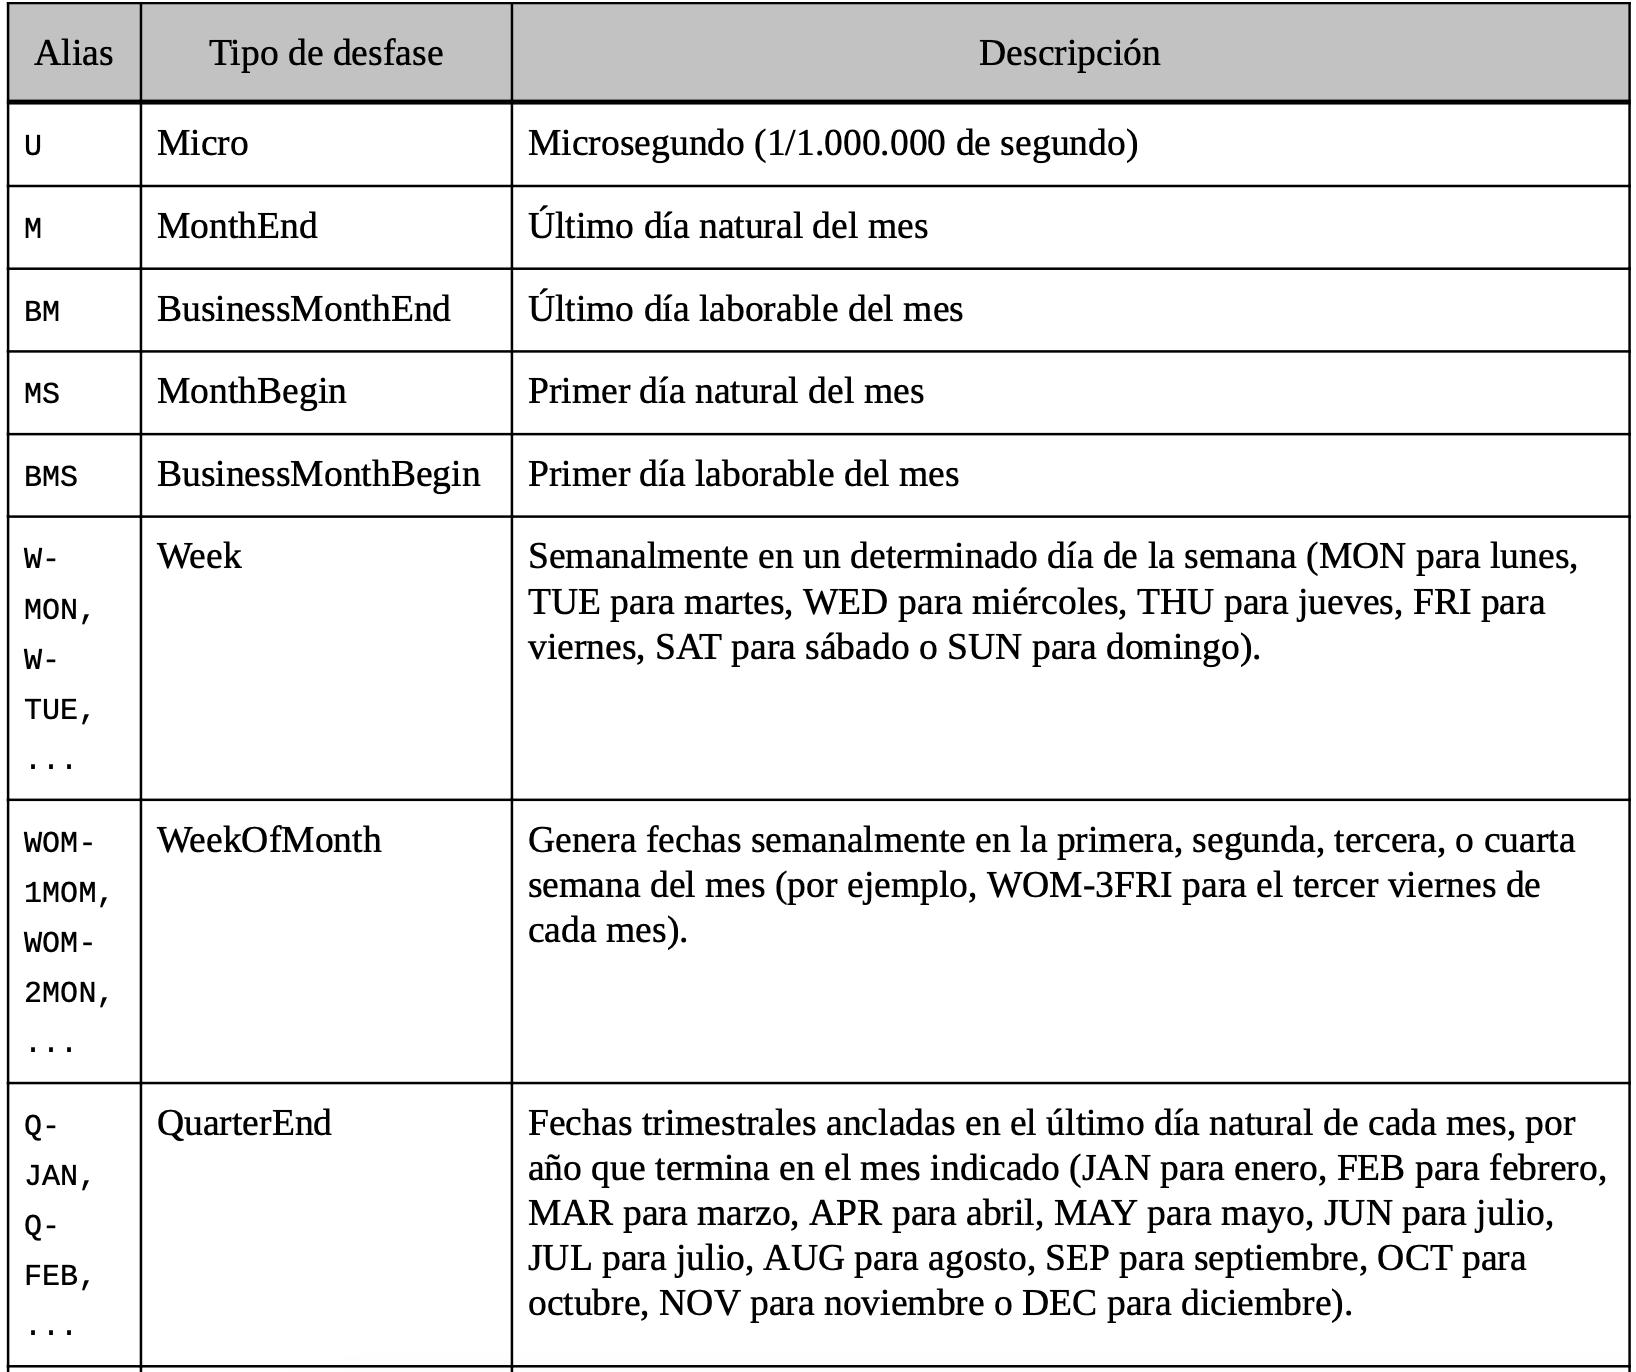

# Tendencia

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv",parse_dates = True, index_col=0)

### Mann-Kendal test

La prueba no paramétrica de Mann-Kendall (MK) es ampliamente utilizada en el análisis de tendencias debido a su robustez y simplicidad. El estadístico de prueba $(S)$ de la serie $p_1,p_2,p_3,..., p_n$ se estiman a través de la ecuación: 

\begin{equation}
S=\sum_{j=1}^{n-1}\sum_{k=j+1}^n \ sign   (p_k-p_j),
\end{equation} 


 donde $n$ representa la observación total, $p_k$ y $p_j $indica los datos observados del tiempo $k$ y $j$, donde la función $sign$ se define como:

\begin{equation}
\ sign  (p_k-p_j)= \left\{ \begin{array}{lcc}
 1 & \mbox{if} & (p_k-p_j)>0 \\ \\ 0 & \mbox{if} & (p_k-p_j)=0 \\ \\ -1 & \mbox{if} & (p_k-p_j)<0 \end{array} \right.
\end{equation}


La varianza de $S$ se estima de la siguiente manera:

\begin{equation}
VAR(S)=\frac{1}{18}\left[   n(n-1)(2n+5)-\sum_{j=1}^g T_j(T_j-1)(2T_j+5).  \right]
\end{equation}

Aquí, $g$ es el número del grupo vinculado, $T_j$ se refiere a la extensión del $j$-ésimo número vinculado. A partir de $S$ y *VAR(S)*, la medida de prueba estandarizada $Z$ se calcula utilizando la ecuación:

\begin{equation}\label{Z}
Z = \left\{ \begin{array}{lcc}
\frac{S-1}{\sqrt{VAR(S)}} & \mbox{if} & S > 0 \\ 
\\ 0 & \mbox{if} & S=0 \\ 
\\ \frac{S+1}{\sqrt{VAR(S)}} & \mbox{if} & S<0 \end{array} \right.
\end{equation}

Un valor positivo de $Z$ indica tendencias crecientes, mientras que un valor negativo indica tendencias decrecientes en los datos de la serie temporal.



   * $H_0$: No hay una tendencia monótona en la serie.
   
   * $H_a$: Existe una tendencia. Esta tendencia puede ser positiva, negativa o no ula.

Las pruebas de Mann-Kendall devuelven una tupla con nombre que contiene:

* Tendencia: indica la tendencia (creciente, decreciente o sin tendencia)

* h: Verdadero (si la tendencia está presente) o Falso (si la tendencia está ausente)
     
* p: valor p de la prueba de significancia
     
* z: estadísticas de prueba normalizadas
     
* Tau: Kendall Tau
     
* s: puntuación de Mann-Kendal
     
* var_s: Varianza S
     
* pendiente: estimador de Theil-Sen/pendiente
     
* intersección: intersección de Kendall-Theil Robust Line, para pruebas estacionales, ciclo de período completo considerado como paso de tiempo unitario

In [17]:
import pymannkendall as mk

## Análisis de Tendencias Innovadoras (ITA)

El método de ITA fue introducido por Sen Zekai en 2011 para evaluar las tendencias de diferentes datos de series temporales. Este método no considera la normalidad, la autocorrelación serial ni la longitud de los datos. 

El ITA divide la serie temporal en dos partes iguales, las ordena en orden ascendente y las representa gráficamente en un sistema de coordenadas cartesianas. El eje $X$ del sistema de coordenadas cartesianas se utiliza para la primera mitad de la serie, mientras que el eje $Y$ se utiliza para la segunda mitad. La línea 1:1 en el gráfico de correlación indica que no hay tendencia, la línea de datos por encima de la línea 1:1 indica tendencias crecientes/positivas y por debajo de la línea indica tendencias negativas/decrecientes. 